<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L5_3_Image_Averaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

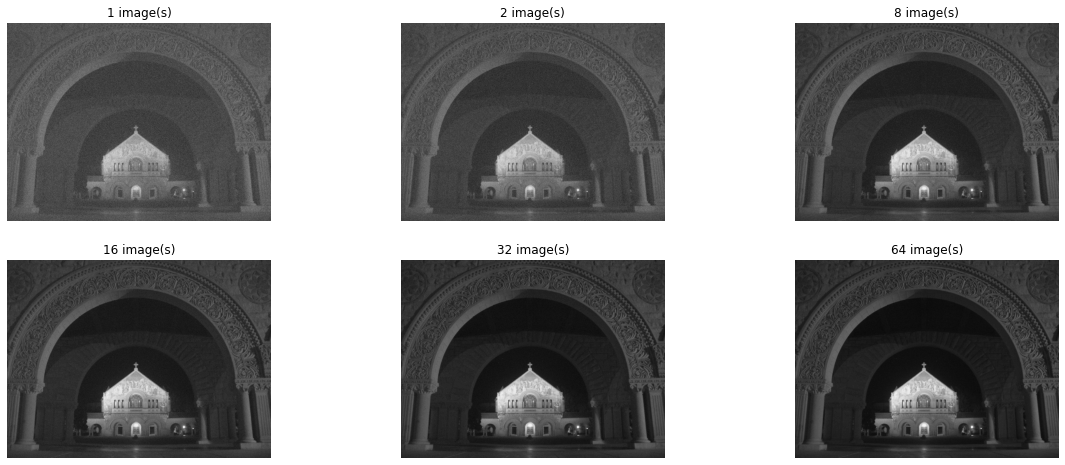

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Define function to convert image to double
def im2double(img):
    return cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

# Define function to add noise to an image
def imnoise(img, noise_type, mean, variance):
    if noise_type == "gaussian":
        sigma = np.sqrt(variance)
        noise = np.zeros_like(img, dtype='float32')
        cv2.randn(noise, mean, sigma)
        noisyImg = img + noise
        return noisyImg

# Load the image from the URL
url = "https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/quadnight.jfif"
response = requests.get(url)
Img = im2double(cv2.imdecode(np.frombuffer(response.content, np.uint8), cv2.IMREAD_GRAYSCALE))

# Define an array of sample image numbers
nArray = [1, 2, 8, 16, 32, 64]

# Repeat over number of sample images
for i in range(len(nArray)):
    N = nArray[i]
    avgImg = np.zeros_like(Img); # initialize an empty image

    # add Gaussian noise to each image, accumulate this image to average image
    for j in range(N):
        noisyImg = imnoise(Img, "gaussian", 0, 0.01)
        avgImg = avgImg + noisyImg

    # show image
    avgImg = avgImg / N;
    plt.rcParams['figure.figsize'] = [20, 8]
    plt.subplot(2, len(nArray)/2, i+1)
    plt.imshow(avgImg, cmap='gray'), plt.title(str(N) + ' image(s)')
    plt.axis('off')
    
plt.show()
